## P6.4.1
-----

  Time    Radius
------  --------
  0.1       11.1
  0.24      19.9
  0.38      25.4
  0.52      28.8
  0.66      31.9
  0.8       34.2
  0.94      36.3
  1.08      38.9
  1.22      41
  1.36      42.8
  1.5       44.4
  1.65      46
  1.79      46.9
  1.93      48.7
  3.26      59
  3.53      61.1
  3.8       62.9
  4.07      64.3
  4.34      65.6
  4.61      67.3
 15        106.5
 25        130
 34        145
 53        175
 62        185


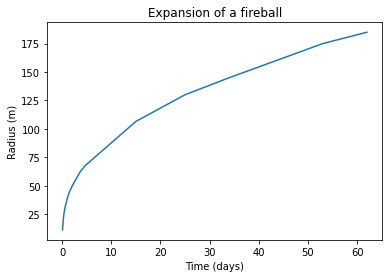

The energy of the fireball is 1.162e+32 Joules or 2.778e+19 tonnes of TNT.


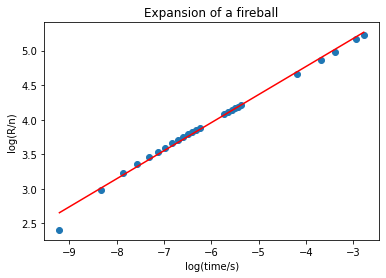

In [18]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

time, radius = np.loadtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/new-mexico-blast-data.txt",
    unpack=True,
    skiprows=1,
)

print(tabulate(np.vstack([time, radius]).T, headers=["Time", "Radius"]))

plt.plot(time, radius)
plt.xlabel("Time (days)")
plt.ylabel("Radius (m)")
plt.title("Expansion of a fireball")
plt.show()

log_time, log_radius = np.log(time / 1000), np.log(radius)
air_density = 1.25

m, c = np.polyfit(log_time, log_radius, 1)
E = air_density * 10 ** (5 * c)

print(
    f"The energy of the fireball is {E:.3e} Joules or {E / 4.184e12:.3e} tonnes of TNT."
)
plt.plot(log_time, log_radius, "o")
line = m * np.linspace(min(log_time), max(log_time), 1000) + c
plt.plot(np.linspace(min(log_time), max(log_time), 1000), line, "r")
plt.xlabel("log(time/s)")
plt.ylabel("log(R/n)")
plt.title("Expansion of a fireball")
plt.show()


## P6.4.2
-----

╒══════════╤══════════╤══════════════╤══════════════╤═════════════╤══════════════╕
│   x-mean │   y-mean │   x-variance │   y-variance │   R-squared │ y = mx + c   │
╞══════════╪══════════╪══════════════╪══════════════╪═════════════╪══════════════╡
│        9 │  7.50091 │           10 │      3.75206 │    0.666542 │ 0.50x + 3.00 │
├──────────┼──────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│        9 │  7.50091 │           10 │      3.75239 │    0.666242 │ 0.50x + 3.00 │
├──────────┼──────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│        9 │  7.5     │           10 │      3.74784 │    0.666324 │ 0.50x + 3.00 │
├──────────┼──────────┼──────────────┼──────────────┼─────────────┼──────────────┤
│        9 │  7.50091 │           10 │      3.74841 │    0.666707 │ 0.50x + 3.00 │
╘══════════╧══════════╧══════════════╧══════════════╧═════════════╧══════════════╛


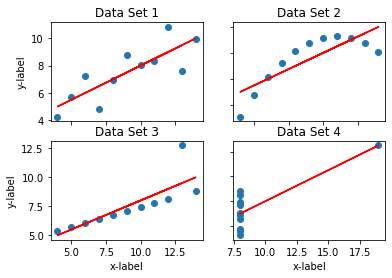

In [48]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

data = np.loadtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/ex6-4-a-anscombe.txt",
)
# print(tabulate(data, headers=["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"], tablefmt="fancy_grid"))

# Split the data up into the four groups
x1, y1 = data[:, 0], data[:, 1]
x2, y2 = data[:, 2], data[:, 3]
x3, y3 = data[:, 4], data[:, 5]
x4, y4 = data[:, 6], data[:, 7]

# Plot the data
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x1, y1, "o")
axs[0, 0].set_title("Data Set 1")
axs[0, 1].plot(x2, y2, "o")
axs[0, 1].set_title("Data Set 2")
axs[1, 0].plot(x3, y3, "o")
axs[1, 0].set_title("Data Set 3")
axs[1, 1].plot(x4, y4, "o")
axs[1, 1].set_title("Data Set 4")

for ax in axs.flat:
    ax.set(xlabel="x-label", ylabel="y-label")
for ax in axs.flat:
    ax.label_outer()
# Create a linear regression for each data set
slope1, intercept1 = np.polyfit(x1, y1, 1)
slope2, intercept2 = np.polyfit(x2, y2, 1)
slope3, intercept3 = np.polyfit(x3, y3, 1)
slope4, intercept4 = np.polyfit(x4, y4, 1)

# Calculate the R-squared value for each linear regression
r_squared1 = 1 - np.var(y1 - (slope1 * x1 + intercept1)) / np.var(y1)
r_squared2 = 1 - np.var(y2 - (slope2 * x2 + intercept2)) / np.var(y2)
r_squared3 = 1 - np.var(y3 - (slope3 * x3 + intercept3)) / np.var(y3)
r_squared4 = 1 - np.var(y4 - (slope4 * x4 + intercept4)) / np.var(y4)

# Plot the linear regression for each data set and add the R-squared value
axs[0, 0].plot(x1, slope1 * x1 + intercept1, "r")
axs[0, 1].plot(x2, slope2 * x2 + intercept2, "r")
axs[1, 0].plot(x3, slope3 * x3 + intercept3, "r")
axs[1, 1].plot(x4, slope4 * x4 + intercept4, "r")


# Create an array containing information about each data set
dataset1_info = np.array(
    [
        np.mean(x1),
        np.mean(y1),
        np.var(x1),
        np.var(y1),
        r_squared1,
        f"{slope1:.2f}x + {intercept1:.2f}",
    ]
)
dataset2_info = np.array(
    [
        np.mean(x2),
        np.mean(y2),
        np.var(x2),
        np.var(y2),
        r_squared2,
        f"{slope2:.2f}x + {intercept2:.2f}",
    ]
)
dataset3_info = np.array(
    [
        np.mean(x3),
        np.mean(y3),
        np.var(x3),
        np.var(y3),
        r_squared3,
        f"{slope3:.2f}x + {intercept3:.2f}",
    ]
)
dataset4_info = np.array(
    [
        np.mean(x4),
        np.mean(y4),
        np.var(x4),
        np.var(y4),
        r_squared4,
        f"{slope4:.2f}x + {intercept4:.2f}",
    ]
)

print(
    tabulate(
        [dataset1_info, dataset2_info, dataset3_info, dataset4_info],
        headers=[
            "x-mean",
            "y-mean",
            "x-variance",
            "y-variance",
            "R-squared",
            "y = mx + c",
        ],
        tablefmt="fancy_grid",
    )
)


## P6.4.3
-----

V_liquid = 54.43 cm^3.mol^-1
V_gas = 24.32dm^3.mol^-1

V_gas = 271.52dm^3.mol^-1


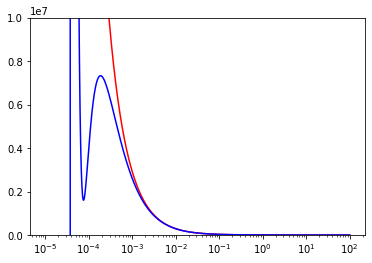

In [93]:
import numpy as np

a: float = 0.4225
b: float = 0.00003707
R: float = 8.314
p_c = a / (27*b**2)
T_c = (8*a) / (27*R*b)

def equation(a: float, b: float, T: float, p: float) -> np.polynomial.Polynomial:
    equation = np.polynomial.Polynomial([-a*b, a, -(p*b+R*T), p])
    return equation

# a)    
poly = equation(a, b, 298.0, 101325.0)
roots = poly.roots()
roots.sort()

V_liquid, V_gas = roots[0], roots[-1]
print(f"V_liquid = {V_liquid*1.0e6:.2f} cm^3.mol^-1")
print(f"V_gas = {V_gas*1.0e3:.2f}dm^3.mol^-1")

poly = equation(a, b, 500.0, 12.0e6)
roots = poly.roots()
V_gas = roots[roots.imag==0][0].real
print(f"\nV_gas = {V_gas*1.0e6:.2f}dm^3.mol^-1")

# b)
T = 350
V = np.logspace(-5, 2, 1000)
plt.plot(V, R*T/V, "r")
plt.plot(V, R*T/(V-b) - a*V**-2, "b")
plt.ylim(0, 1.0e7)
plt.xscale("log")
plt.show()



## P6.4.4
-----

a(t) = 2.198 + 0.02842 x**1 + 0.001061 x**2
v(t) = 0.0 + 2.198 x**1 + 0.01421 x**2 + 0.0003536666666666667 x**3
d(t) = 0.0 + 0.0 x**1 + 1.099 x**2 + 0.004736666666666667 x**3 +
8.841666666666667e-05 x**4
The distance travelled at 135.2s is 61.34m


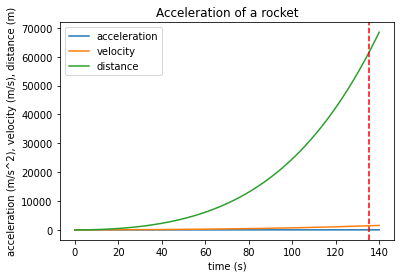

In [77]:
import numpy as np
import matplotlib.pyplot as plt


acceleration = np.polynomial.Polynomial([2.198, 0.02842, 0.001061])
print(f"a(t) = {acceleration}")
velocity = acceleration.integ()
print(f"v(t) = {velocity}")
distance = velocity.integ()
print(f"d(t) = {distance}")
print(f"The distance travelled at 135.2s is {distance(135.2) / 1000:.2f}m")

time = np.linspace(0, 140, 1000)
acceleration_values, velocity_values, distance_values = (
    acceleration(time),
    velocity(time),
    distance(time),
)

plt.plot(time, acceleration_values)
plt.plot(time, velocity_values)
plt.plot(time, distance_values)
plt.axvline(135.2, color="r", linestyle="--")
plt.xlabel("time (s)")
plt.ylabel("acceleration (m/s^2), velocity (m/s), distance (m)")
plt.legend(["acceleration", "velocity", "distance"])
plt.title("Acceleration of a rocket")
plt.show()
